# Unsupervised Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# K-Means on Iris Data Set

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("iris.csv")
print(data.head(5))
print(data.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


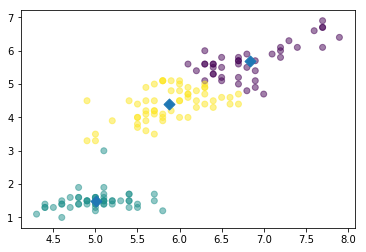

In [42]:
from sklearn.cluster import KMeans

features=['sepal_length','sepal_width','petal_length','petal_width']
labels_target=['species']

X=data[features].values
y=data[labels_target].values

kmeans=KMeans(n_clusters=3)
kmeans.fit(X[:,(0,2)])
#labels=kmeans.predict(X[:,(0,2)])
print(kmeans.labels_)

plt.scatter(X[:,0],X[:,2],c=labels,alpha=0.5)
centroids=kmeans.cluster_centers_
cenntroids_x=centroids[:,0]
cenntroids_y=centroids[:,1]
plt.scatter(cenntroids_x,cenntroids_y,marker='D',s=60)
plt.show()

### Measuring Clustering performance when we already have clustering in our dataset

In [43]:
data['labels']=labels
print(pd.crosstab(data['labels'],data['species']))

print("This give us a good insight of the clustering, Setosa has 50 & only 1 non-cluster")

species  setosa  versicolor  virginica
labels                                
0             0           4         37
1            50           1          0
2             0          45         13
This give us a good insight of the clustering, Setosa has 50 & only 1 non-cluster


### Using Inertia for measuring clusters when we don't have the defined clusters

Inertia is a measure of how far our clusters are spread out. A good clustering has tighter clusters and hence low inertia

Inertia for our current model: 13.334222819578084
The clue is to choose a point from where the inertia starts decreasing slowly. In this case 3 is a point on the graph


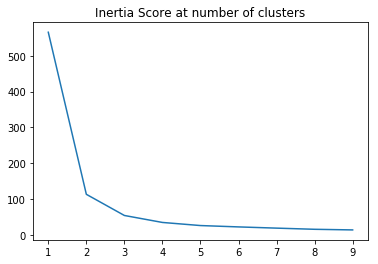

In [50]:
print("Inertia for our current model: {}".format(kmeans.inertia_))

# Lets do a run by for clusters
inertia_score=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X[:,(0,2)])
    inertia_score.append(kmeans.inertia_)

plt.plot(np.arange(1,10),inertia_score) 
plt.title('Inertia Score at number of clusters')

print("The clue is to choose a point from where the inertia starts decreasing slowly. In this case 3 is a point on the graph")

In [63]:
fish_data=pd.read_csv("fishcatch.csv")
col=['Species','Weight','Length1','Length2','Length3','Height%','Width%','Sex']
fish_data=fish_data[col]
print(fish_data.head(5))
print(fish_data.info())

   Species  Weight  Length1  Length2  Length3  Height%  Width%  Sex
0        1   242.0     23.2     25.4     30.0     38.4    13.4  NaN
1        1   290.0     24.0     26.3     31.2     40.0    13.8  NaN
2        1   340.0     23.9     26.5     31.1     39.8    15.1  NaN
3        1   363.0     26.3     29.0     33.5     38.0    13.3  NaN
4        1   430.0     26.5     29.0     34.0     36.6    15.1  NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
Species    159 non-null int64
Weight     158 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height%    159 non-null float64
Width%     159 non-null float64
Sex        72 non-null float64
dtypes: float64(7), int64(1)
memory usage: 10.0 KB
None


Species   1  2   3  4   5   6   7
labels                           
0         0  3  19  4   1   0  36
1         6  3   0  0   0   0  18
2         0  0   0  0  13   0   0
3         0  0   0  0   0   5   0
4         0  0   0  0   0  12   0
5        23  0   1  4   0   0   0
6         6  0   0  3   0   0   2


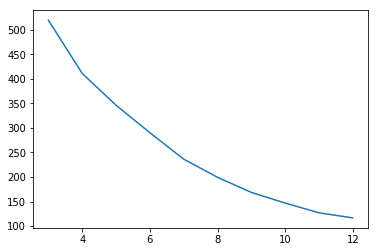

In [84]:
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)

scaler=StandardScaler()
model=KMeans(n_clusters=7)

pipeline=make_pipeline(imp,scaler,model)

features=['Weight','Length1','Length2','Length3','Height%','Width%','Sex']
target=['Species']
data=fish_data[features]

pipeline.fit(data)
fish_data['labels']=pipeline.predict(data)
print(pd.crosstab(fish_data['labels'],fish_data['Species']))

print("Drawing Inertia graph to indenftify ideal clusters since we have 7 kinds of species")
imputer=imputer.fit(data)
data=imputer.transform(data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

inertia_score=[]
for i in range(3,13):
    model=KMeans(n_clusters=i)
    model.fit(scaled_data)
    inertia_score.append(model.inertia_)

plt.plot(np.arange(3,13),inertia_score)

### Analyzing stocks with similar daily price movement

In [200]:
stockData=pd.read_csv("company-stock-movements.csv")
dataset=stockData.iloc[:, 1:]
model=KMeans(n_clusters=10)
labels=model.fit_predict(dataset)

companies=list(stockData.iloc[:,0])
df=pd.DataFrame({'labels':labels,'companies':companies})
print(df.sort_values(by=['labels']))

    labels                           companies
29       0                     Lookheed Martin
36       0                    Northrop Grumman
32       0                                  3M
3        0                    American express
4        0                              Boeing
17       1                     Google/Alphabet
0        2                               Apple
7        3                               Canon
34       3                          Mitsubishi
1        3                                 AIG
37       3                            Novartis
38       3                               Pepsi
39       3                              Pfizer
40       3                      Procter Gamble
41       3                       Philip Morris
42       3                   Royal Dutch Shell
43       3                                 SAP
45       3                                Sony
46       3                      Sanofi-Aventis
47       3                            Symantec
48       3   

# Hierarchial visualization of the above stock

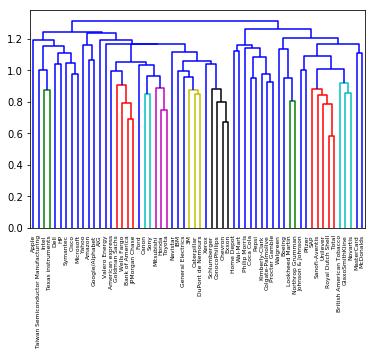

In [201]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize


normalize_movement=normalize(dataset)
mergings=linkage(normalize_movement,method='complete')
dendrogram(mergings,labels=companies,leaf_rotation=90,leaf_font_size=6)
plt.show()

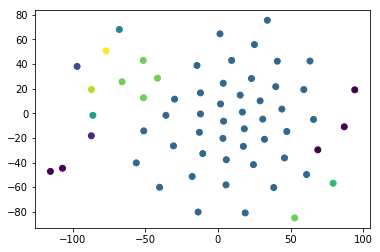

In [209]:
# Implemetin TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(dataset)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=labels)
plt.show()



In [207]:
np.array(companies)

array(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'British American Tobacco', 'Canon',
       'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco',
       'Chevron', 'DuPont de Nemours', 'Dell', 'Ford',
       'General Electrics', 'Google/Alphabet', 'Goldman Sachs',
       'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel',
       'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark',
       'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M',
       'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman',
       'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris',
       'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
       'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total',
       'Taiwan Semiconductor Manufacturing', 'Texas instruments',
       'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart',
       'Exxon', 'Xerox', 'Yahoo'], dtype='<U34')

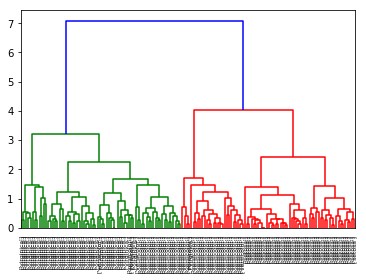

In [163]:
## Implemeting Hierarchial visualization
data=pd.read_csv("iris.csv")
features=['sepal_length','sepal_width','petal_length','petal_width']
labels_target=['species']
X=data[features].values
y=data[labels_target].values
kmeans=KMeans(n_clusters=3)
kmeans.fit(X[:,(0,2)])
labels=kmeans.predict(X[:,(0,2)])


mergings=linkage(X,method='complete')
dendrogram(mergings,labels=y,leaf_rotation=90,leaf_font_size=6)
plt.show()

### Working with  grain data for above

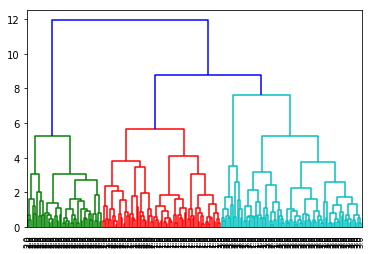

In [176]:
data=pd.read_csv("seeds.csv")
data=data.values
# Lets analyse just top 40 rows
X=data[:,[0,1,2,3,4,5,6]]
y=data[:,7]

mergings=linkage(X,method='complete')
dendrogram(mergings,labels=y,leaf_rotation=90,leaf_font_size=8)
plt.show()

### Cluster Labels in Hierarchial Labelling

In [175]:
from scipy.cluster.hierarchy import fcluster

labels=fcluster(mergings,8,criterion='distance')
dfs=pd.DataFrame({'labels':labels,'varieties':y})
print(pd.crosstab(dfs['labels'],dfs['varieties']))

varieties  1.0  2.0  3.0
labels                  
1            0   47    0
2           51   23    0
3           18    0   70


In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=y)
plt.show()


# Decorrelation and Dimension Reduction

### PCA on grain data analysis 
We have seed length and width we are trying to see if they have any correlation

In [224]:
data=pd.read_csv("seeds-width-vs-length.csv",header=None)
print(data.head(5))
print(data.info())
data=data.values


       0      1
0  3.312  5.763
1  3.333  5.554
2  3.337  5.291
3  3.379  5.324
4  3.562  5.658
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
0    210 non-null float64
1    210 non-null float64
dtypes: float64(2)
memory usage: 3.4 KB
None


(0.8604149377143467, 8.121332906193427e-63)


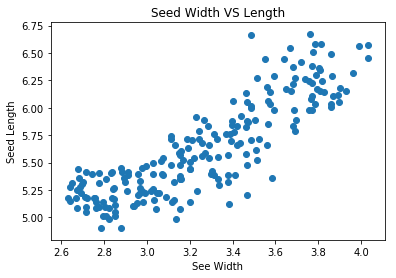

In [225]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
width=data[:,0]
length=data[:,1]

print(pearsonr(width,length))
plt.scatter(width,length)
plt.title("Seed Width VS Length")
plt.xlabel("See Width")
plt.ylabel("Seed Length")
plt.show()

### Applying PCA

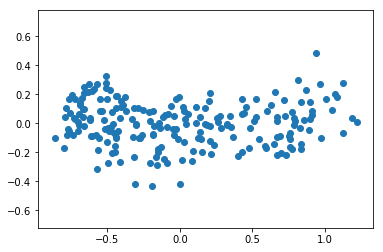

(7.474656899453042e-17, 1.0)


In [228]:
model=PCA()
data_trans=model.fit_transform(data)
transformedW=data_trans[:,0]
transformedL=data_trans[:,1]
plt.scatter(transformedW,transformedL)
plt.axis('equal')
plt.show()

print(pearsonr(transformedW,transformedL))

### Intrinsic Dimension
1) The number of dimensions required to approximate the data<br>
2) What is the most compact represntation of the samples

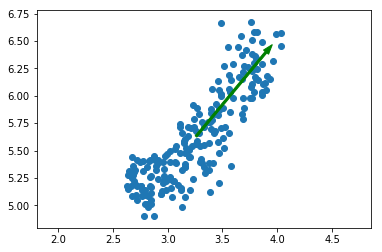

In [230]:
plt.scatter(data[:,0],data[:,1])
mean=model.mean_
first_pc=model.components_[0,:]
plt.arrow(mean[0],mean[1],first_pc[0],first_pc[1],color='green',width=0.02)
plt.axis('equal')
plt.show()

### Applying all the above methods on Fishdata

In [240]:
data=pd.read_csv('fishcatch.csv')
df=data.values
dfeatures=df[:,1:7]
print(dfeatures)

[[ 242.    23.2   25.4   30.    38.4   13.4]
 [ 290.    24.    26.3   31.2   40.    13.8]
 [ 340.    23.9   26.5   31.1   39.8   15.1]
 [ 363.    26.3   29.    33.5   38.    13.3]
 [ 430.    26.5   29.    34.    36.6   15.1]
 [ 450.    26.8   29.7   34.7   39.2   14.2]
 [ 500.    26.8   29.7   34.5   41.1   15.3]
 [ 390.    27.6   30.    35.    36.2   13.4]
 [ 450.    27.6   30.    35.1   39.9   13.8]
 [ 500.    28.5   30.7   36.2   39.3   13.7]
 [ 475.    28.4   31.    36.2   39.4   14.1]
 [ 500.    28.7   31.    36.2   39.7   13.3]
 [ 500.    29.1   31.5   36.4   37.8   12. ]
 [   nan   29.5   32.    37.3   37.3   13.6]
 [ 600.    29.4   32.    37.2   40.2   13.9]
 [ 600.    29.4   32.    37.2   41.5   15. ]
 [ 700.    30.4   33.    38.3   38.8   13.8]
 [ 700.    30.4   33.    38.5   38.8   13.5]
 [ 610.    30.9   33.5   38.6   40.5   13.3]
 [ 650.    31.    33.5   38.7   37.4   14.8]
 [ 575.    31.3   34.    39.5   38.3   14.1]
 [ 685.    31.4   34.    39.2   40.8   13.7]
 [ 620.   

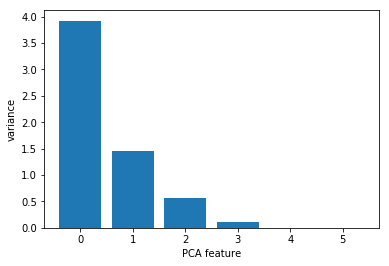

The graph shows the intrinsic number of features we need for predicint or fitting a model


In [246]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
std=StandardScaler()
pca=PCA()
pipeline=make_pipeline(imputer,std,pca)
pipeline.fit(dfeatures)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

print("The graph shows the intrinsic number of features we need for predicint or fitting a model")

### Dimension reduction on fish data
We are reducing the dimensions on our data set as we saw above that we only need 2 features from our data set which could define the model

In [250]:
imputer=imputer.fit(dfeatures)
dfeatures=imputer.transform(dfeatures)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfeatures)


pca=PCA(n_components=2)
pca.fit(scaled_data)
pca_features=pca.transform(scaled_data)

print(pca_features.shape)


(159, 2)


### Lets say we have a list of words called documents which store words, the task it to build an array where row will be the document and columns with be the word. The data will be the number of times a word occured in each document

In [252]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

documents=['cats say meow','dogs say woof','dogs chase cats']

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


# Building Recommender Systems for Article, Music Suggestion

### Non Negative matrix factorization
1) Dimension Reduction Technique<br>
2) They are easy to understand and explain<br>
3) All features need to be non-negative <br>
4) NMF achieve is interpretability because of all it's ability to decompose samples as sum of their parts<br> 
5) eg NMF decomposes documents as combination of common topics, images and combinations of patterns 

We will make use of dataset where each row is a word and columns are articles. Each cell represents how many times a word showed up in the article and group the words accoerding to that.

In [320]:
data=pd.read_csv('wikipedia-vectors.csv')
data.index=data['Unnamed: 0']
del data['Unnamed: 0']
data=data.transpose()
articles=data.values


In [324]:
from sklearn.decomposition import NMF
model=NMF(n_components=6)
model.fit(articles)
nmf_features=model.transform(articles)

df=pd.DataFrame(nmf_features,data.index)

print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

print("It shows both articles are made by combining the 3rd NMF component")

0    0.003846
1    0.000000
2    0.000000
3    0.575670
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422350
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64
It shows both articles are made by combining the 3rd NMF component


### Exploring LED Digit Sets

(100, 104)
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


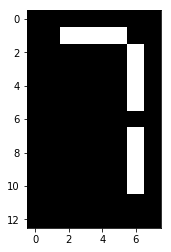

In [339]:
data=pd.read_csv('lcd-digits.csv',header=None)
data=data.values
print(data.shape)

# Get the first digit 
digit=data[0,]

bitmap=digit.reshape(13,8)
print(bitmap)

plt.imshow(bitmap,cmap='gray',interpolation='nearest')
plt.show()

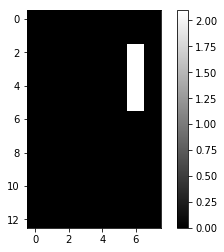

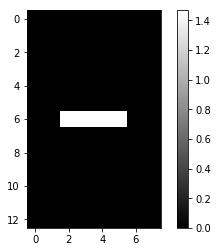

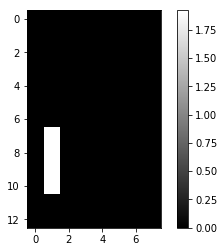

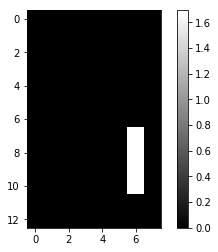

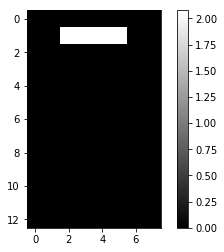

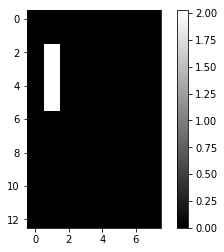

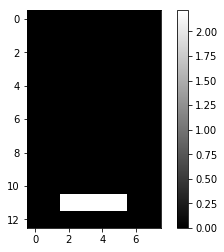

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37551667e-16]


In [341]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
    
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(data)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,]

# Print digit_features
print(digit_features)    

### NMF has expressed the digit has sum of components. NMF decomponses the digit dataset where as seen below PCA doesn't learn in parts, components of PCA doesn't represent meaningful part of images of digits

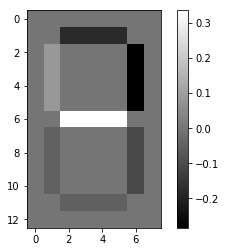

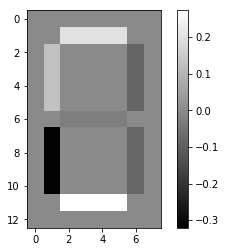

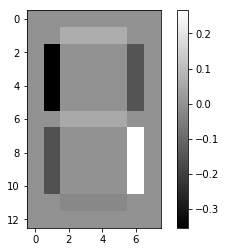

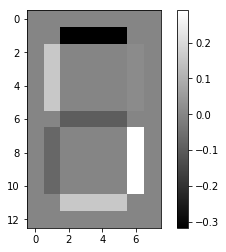

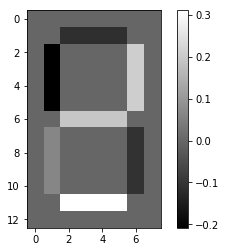

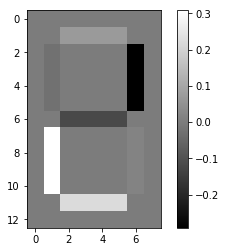

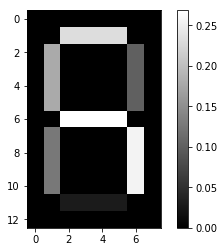

In [345]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(data)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

### Building recommender system using NMF